In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

In [2]:
df= pd.read_csv("TimeSeriesDatasetModified.csv")

In [3]:

start_date='02/04/2018'
end_date='07/02/2022'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftrain=df.loc[mask]

In [4]:

start_date='14/02/2022'
end_date='27/01/2023'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)
dftest=df.loc[mask]

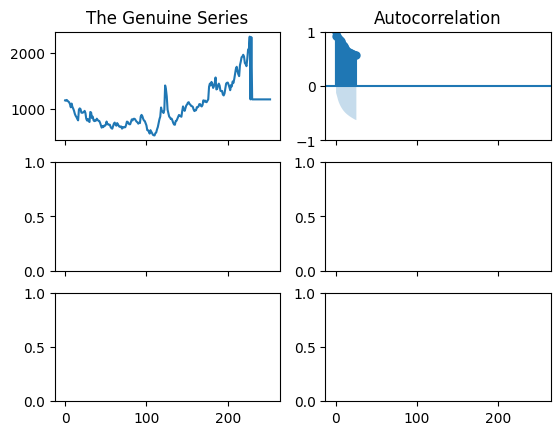

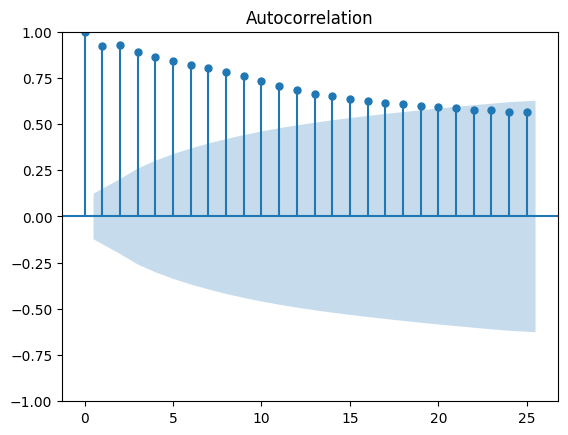

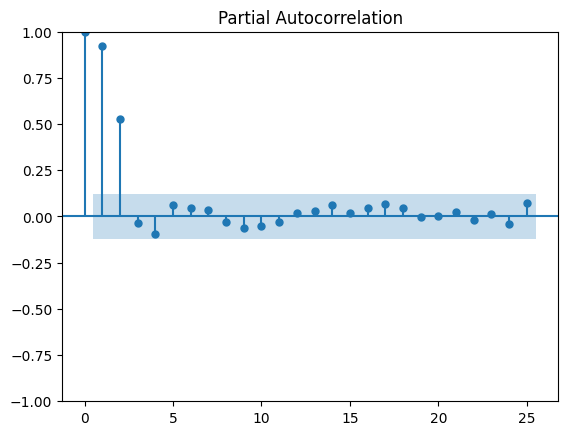

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

Optimal (p, d, q) values: (1, 1, 0)


c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

In [5]:

fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(df['hal_High'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(df['hal_High'], ax=axes[0,1])
dates = pd.to_datetime(df['hal_High'])
values =df['hal_High']
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                   continue
print(f"Optimal (p, d, q) values: {best_order}")

                               SARIMAX Results                                
Dep. Variable:               hal_High   No. Observations:                   41
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -261.288
Date:                Fri, 09 Feb 2024   AIC                            526.575
Time:                        22:57:48   BIC                            529.953
Sample:                             0   HQIC                           527.796
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0296      0.225      0.131      0.895      -0.412       0.472
sigma2      2.762e+04   3737.440      7.390      0.000    2.03e+04    3.49e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tanis\AppData\Local\Temp\ipykernel_16308\2715044886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

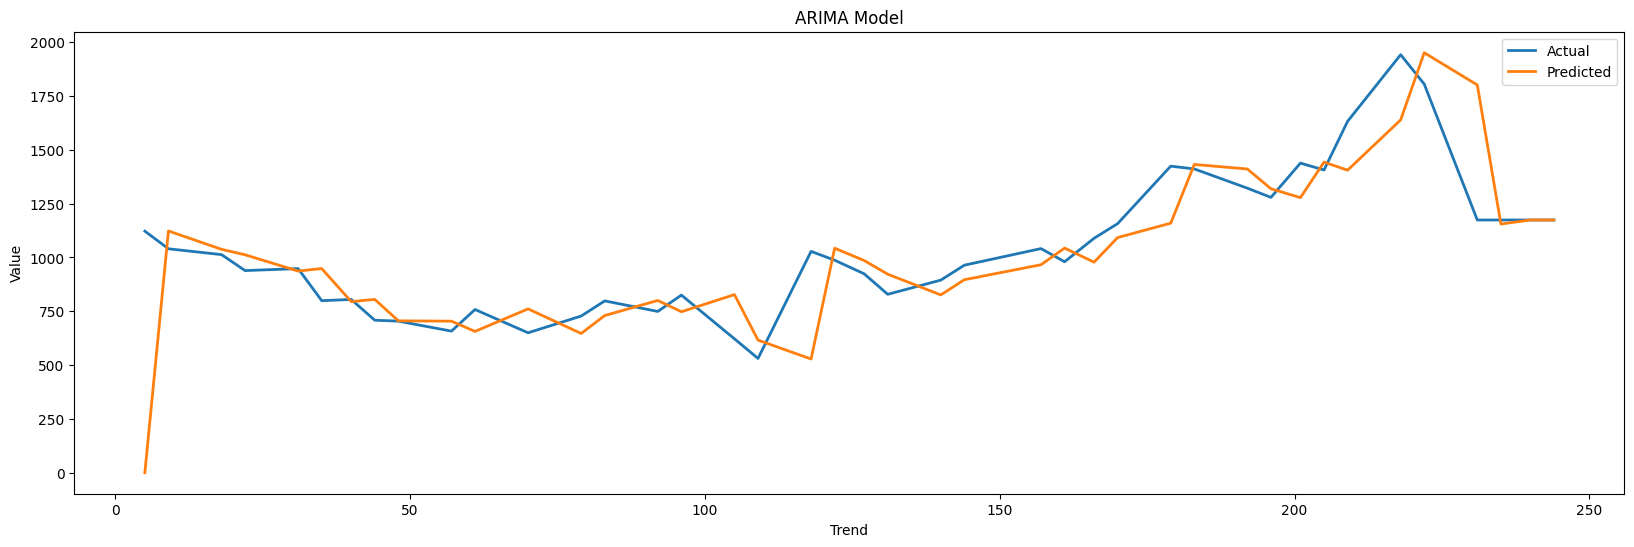

In [6]:
# Prepare the data
dates = pd.to_datetime(dftrain['hal_High'])
values = dftrain['hal_High']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (1, 1, 0)
model = ARIMA(dftrain['hal_High'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

#train
dftrain['hal_High'] = dftrain['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE= mae(dftrain['hal_High'], predictions)
print("MAE:", MAE)
mape = mape(dftrain['hal_High'],predictions) * 100
print("MAPE:",mape)



plt.figure(figsize=(20,6))
plt.plot(dftrain['hal_High'], label='Actual',linewidth=2)
plt.plot(predictions, label='Predicted',linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5433      0.027    -19.936      0.000      -0.597      -0.490
sigma2      2.861e+04   1863.678     15.350      0.000     2.5e+04    3.23e+04
MAE: 112.12641828370181
MAPE: 10.542383053842698


c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\tanis\AppData\Local\Temp\ipykernel_16308\1804845842.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

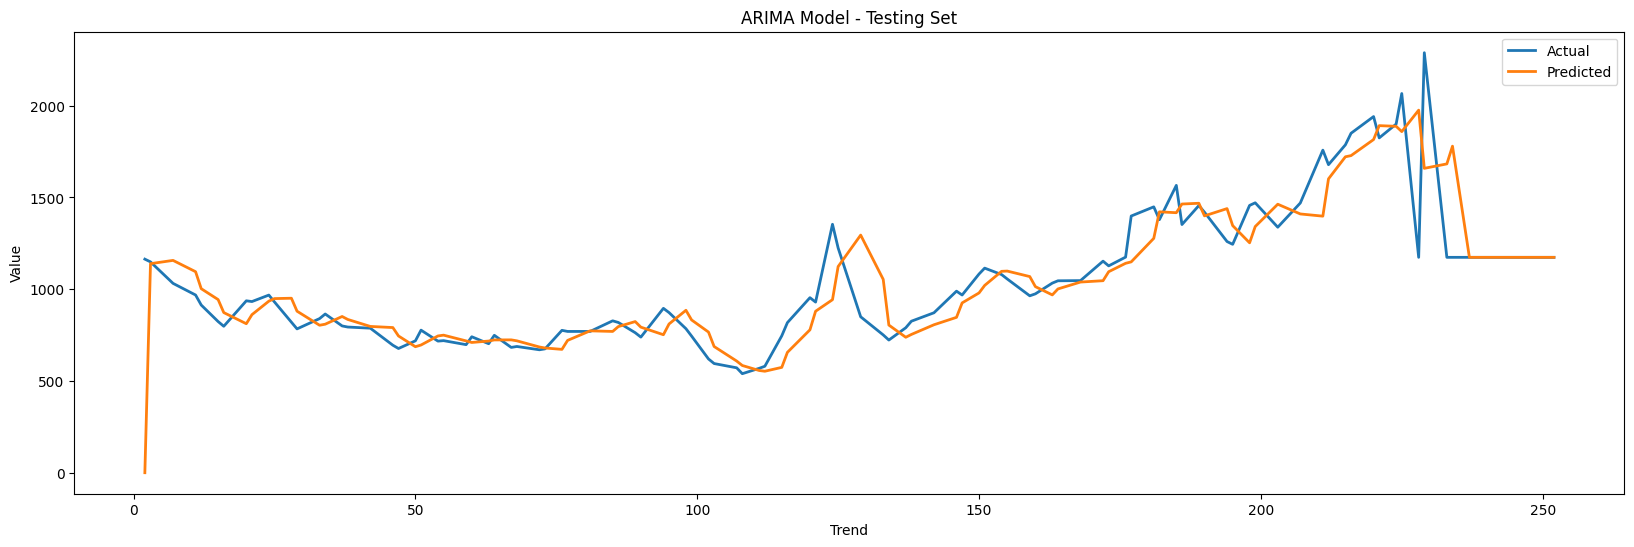

In [7]:
# Prepare the data
dates = pd.to_datetime(dftest['hal_High'])
values = dftest['hal_High']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (1, 1, 0)
model = ARIMA(dftest['hal_High'], order=order)
model_fit = model.fit()

# Print only the ARIMA part of the summary
print(model_fit.summary().tables[1])

# Rest of your code
predictions = model_fit.predict()

# Convert the 'hal_High' column in the testing data to float
dftest['hal_High'] = dftest['hal_High'].astype(float)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

MAE = mae(dftest['hal_High'], predictions)
print("MAE:", MAE)

mape_value = mape(dftest['hal_High'], predictions) * 100
print("MAPE:", mape_value)

plt.figure(figsize=(20, 6))
plt.plot(dftest['hal_High'], label='Actual', linewidth=2)
plt.plot(predictions, label='Predicted', linewidth=2)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model - Testing Set')
plt.legend()
plt.show()